In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning and
end of your recorded signal. Listen to the new signal and perceptually compare the audio with
original.

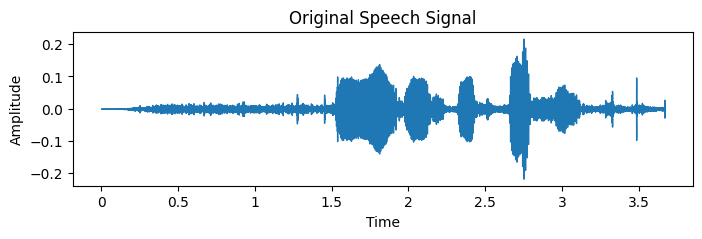

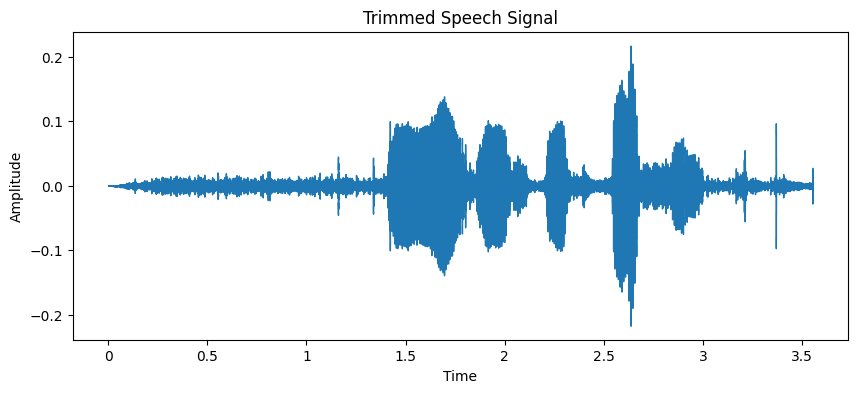

Trimmed Audio:


In [22]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load the audio file
y, sr = librosa.load('/content/drive/MyDrive/mahesh.wav')

# Display the original speech signal
plt.figure(figsize=(8, 2))
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Trim the silent parts from the beginning and end of the signal
y_trimmed, index = librosa.effects.trim(y)

# Display the trimmed speech signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_trimmed, sr=sr)
plt.title('Trimmed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Print the trimmed audio
print("Trimmed Audio:")
ipd.display(ipd.Audio(y_trimmed, rate=sr))


A2. Use librosa.effects.split() to split the recorded speech with detected silences. Play
around with the top_db parameter and see the effects of split. Listen to the generated signals and
observe the split quality.

In [8]:
import librosa
from IPython.display import Audio

# Load the audio file
audio_data, sample_rate = librosa.load('/content/drive/MyDrive/mahesh.wav')

# Split the audio into segments based on silence
audio_segments = librosa.effects.split(audio_data, top_db=5)

num_segments = min(5, len(audio_segments))

for i in range(num_segments):
    segment_bounds = audio_segments[i]
    start_idx, end_idx = segment_bounds

    # Extract the segment audio
    segment_audio = audio_data[start_idx:end_idx]
    print(f"Playing Segment {i+1}: Duration {len(segment_audio)/sample_rate} seconds")
    display(Audio(segment_audio, rate=sample_rate))


Playing Segment 1: Duration 0.37151927437641724 seconds


Playing Segment 2: Duration 0.11609977324263039 seconds


Playing Segment 3: Duration 0.09287981859410431 seconds


Playing Segment 4: Duration 0.13931972789115646 seconds


A3. Use the IEEE paper reference available above for silence detection. Compare the results with the silence detection output from librosa package.

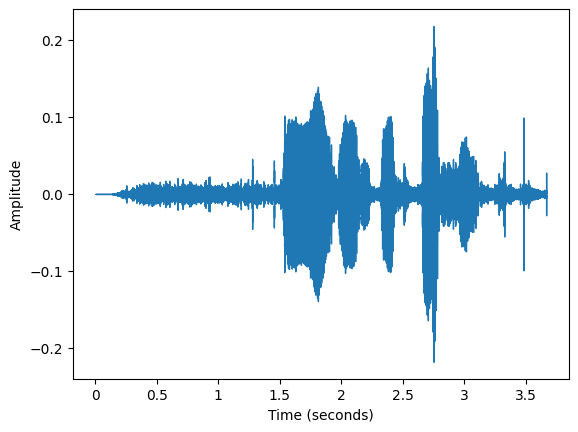

(1025, 173)
80.0


In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
signal, sr = librosa.load("/content/drive/MyDrive/mahesh.wav", sr=None)

# Plot the waveform
plt.figure()
librosa.display.waveshow(y=signal, sr=sr)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Perform Short-Time Fourier Transform (STFT)
n_fft = 2048
S = librosa.stft(signal, n_fft=n_fft, hop_length=n_fft//2)

# Convert amplitude to dB scale
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
print(D.shape)
print(np.max(abs(D)))


In [11]:
muted = librosa.effects.split(signal)
muted

array([[  6144, 176128]])

 start time: 0.128, end time: 3.6693333333333333
 start time: 0.128, end time: 3.6693333333333333


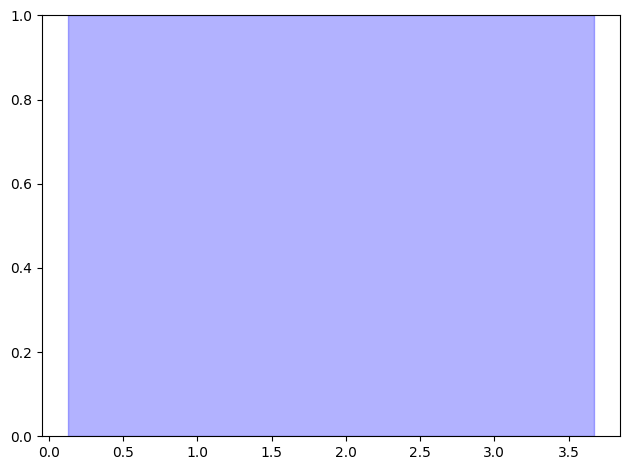

In [19]:
def displayTime(startFrame, endFrame):
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))
for i in muted:
    displayTime(i[0],i[1])
for i, (start, end) in enumerate(muted):
    displayTime(start, end)
    if i % 2 == 0:
        plt.axvspan(start/sr, end/sr, color='blue', alpha=0.3)  # Plot silence segments in blue
    else:
        plt.axvspan(start/sr, end/sr, color='orange', alpha=0.3)  # Plot non-silence segments in orange

plt.tight_layout()
plt.show()

<ipython-input-20-7cc11b959112>:4: RuntimeWarning: divide by zero encountered in log10
  signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)


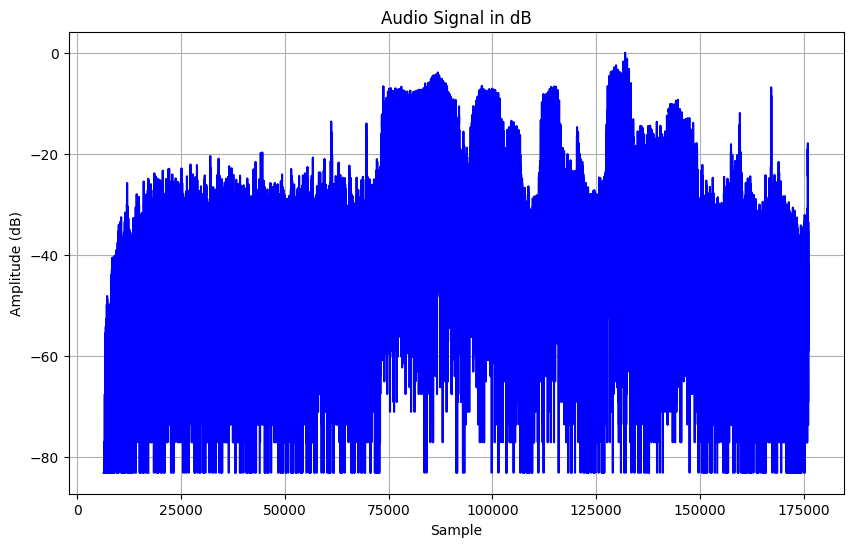

In [20]:
max_amplitude = np.max(np.abs(signal))

# Convert amplitude to dB
signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)

# Plot the dB representation of the signal
plt.figure(figsize=(10, 6))
plt.plot(signal_db, color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Signal in dB')
plt.grid(True)
plt.show()